In [43]:
import pandas as pd
models = ['gb', 'lr', 'nn']
datasets = ['adult', 'lending', 'recidivism']

In [44]:
our_dfs = []
anchor_dfs = []
for model in models:
    for dataset in datasets:
        our_dfs.append(pd.read_csv(f'D:/Github/NBIS/our_results/{model}_{dataset}.csv').drop(columns=['train_acc', 'test_acc', 'missed']))
        anchor_dfs.append(pd.read_csv(f'D:/Github/NBIS/anchor_results/{model}_{dataset}.csv').drop(columns=['train_acc', 'test_acc', 'missed']))
our_df = pd.concat(our_dfs, axis=0)
anchor_df = pd.concat(anchor_dfs, axis=0)

In [45]:
our_summary = our_df.groupby(by=['model', 'dataset']).mean().reset_index()
anchor_summary = anchor_df.groupby(by=['model', 'dataset']).mean().reset_index()

our_mini_summary = our_df[['coverage', 'precision', 'time']].mean().reset_index()
anchor_mini_summary = anchor_df[['coverage', 'precision', 'time']].mean().reset_index()

In [46]:
our_summary.round(3)

,model,dataset,coverage,precision,time
0,gb,adult,0.802,0.768,1.092
1,gb,lending,0.455,0.983,0.795
2,gb,recidivism,0.912,0.678,1.325
3,lr,adult,0.881,0.849,0.867
4,lr,lending,0.617,0.792,0.827
5,lr,recidivism,0.878,0.726,1.403
6,nn,adult,0.840,0.744,0.854
7,nn,lending,0.633,0.765,0.772
8,nn,recidivism,0.839,0.643,1.302


In [47]:
anchor_summary.round(3)

,model,dataset,coverage,precision,time
0,gb,adult,0.140,0.686,0.191
1,gb,lending,0.015,0.488,0.235
2,gb,recidivism,0.060,0.669,0.190
3,lr,adult,0.387,0.799,0.151
4,lr,lending,0.016,0.494,0.134
5,lr,recidivism,0.231,0.701,0.164
6,nn,adult,0.130,0.685,2.468
7,nn,lending,0.014,0.495,0.174
8,nn,recidivism,0.052,0.586,0.240


In [48]:
our_mini_summary.round(3)

,index,0
0,coverage,0.789
1,precision,0.781
2,time,0.981


In [49]:
anchor_mini_summary.round(3)

,index,0
0,coverage,0.157
1,precision,0.662
2,time,0.644


In [50]:
import seaborn as sns

ours = our_df.assign(label='ours')
anchors = anchor_df.assign(label='anchors')
data = pd.concat([ours, anchors])
data = data.rename(columns={'precision': 'Precision', 'coverage': 'Coverage', 'time': 'Time'})

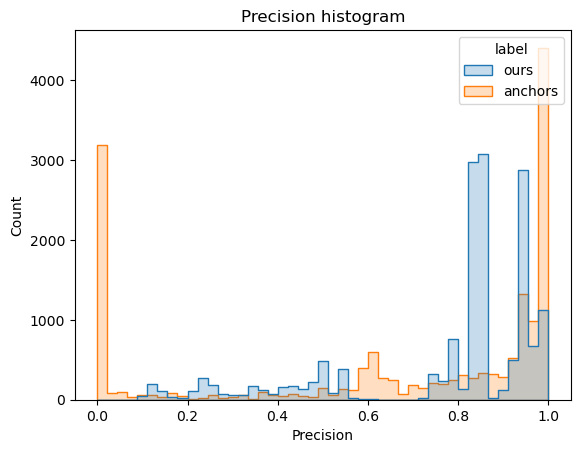

In [51]:
sns.histplot(data=data, x='Precision', hue='label', stat='count', element='step').set_title('Precision histogram');

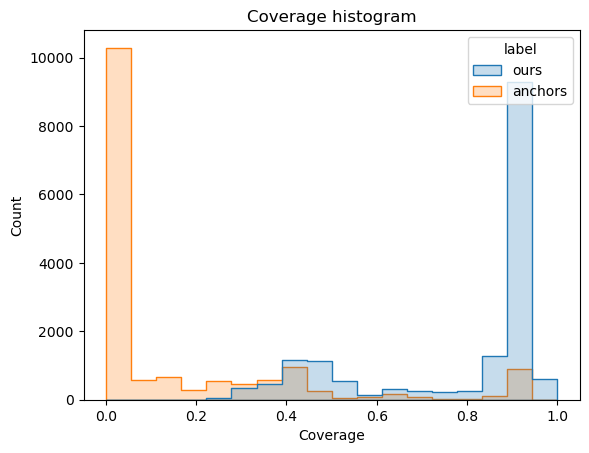

In [52]:
sns.histplot(data=data, x='Coverage', hue='label', stat='count', element='step').set_title('Coverage histogram');

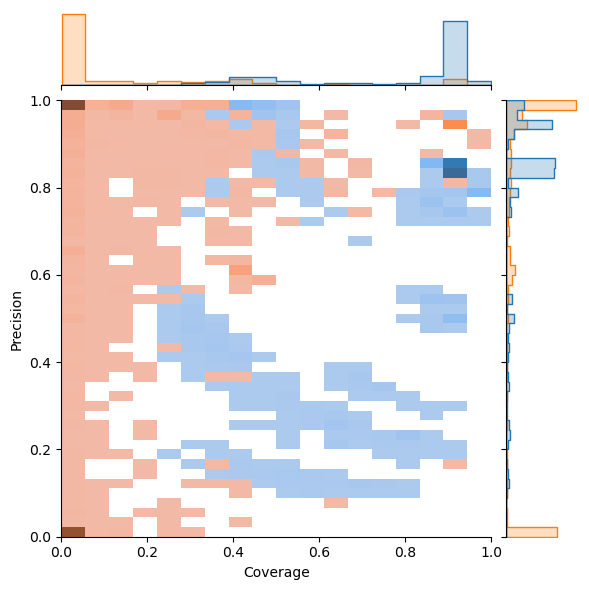

In [59]:
plot = sns.jointplot(data=data, x='Coverage', y='Precision', hue='label', 
              xlim=(0., 1.), ylim=(0., 1.),
              kind='hist', fill=True, marginal_kws={'element': 'step'}, legend=False);

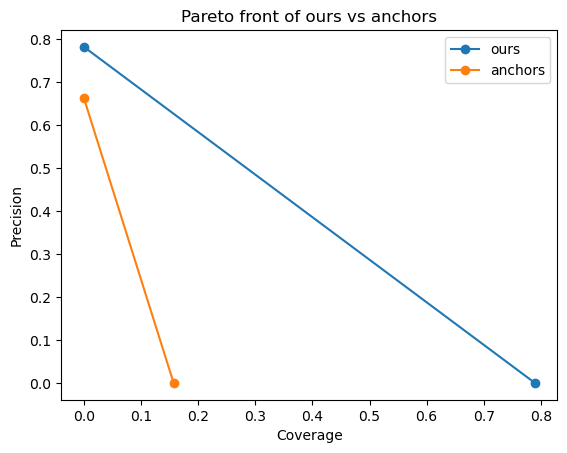

In [54]:
import matplotlib.pyplot as plt

x1, y1 = (0., our_mini_summary.iloc[0, 1]), (our_mini_summary.iloc[1, 1], 0.)
x2, y2 = (0., anchor_mini_summary.iloc[0, 1]), (anchor_mini_summary.iloc[1, 1], 0.)
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.xlabel('Coverage')
plt.ylabel('Precision')
plt.legend(['ours', 'anchors'])
plt.title('Pareto front of ours vs anchors')
plt.show()